<a href="https://colab.research.google.com/github/rafsanalhad/PCVK_17_Harafsan_Alhad/blob/main/Week9_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
morphologyImg = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

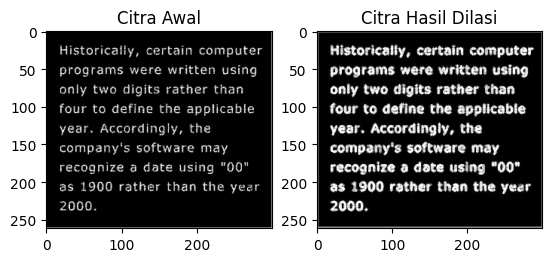

In [4]:
# Gambar yang digunakan
morpImg = morphologyImg.copy()

# Kernel manual
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


# Fungsi dilasi gambar
dilated = cv2.dilate(morpImg, kernel, iterations=1)

# Menampilkan hasil
plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(morpImg)

plt.subplot(122)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated)

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


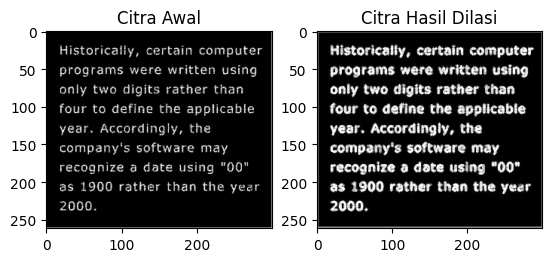

In [5]:
# Gambar yang digunakan
morpImg = morphologyImg.copy()

# Kernel dengan Structuing Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Fungsi dilasi gambar
dilated = cv2.dilate(morpImg, kernel, iterations=1)

# Cetak SED
print(kernel)

# Menampilkan hasil
plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(morpImg)

plt.subplot(122)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated)

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

In [6]:
j_Img = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

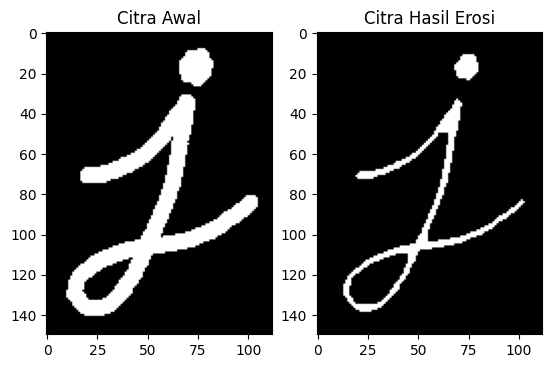

In [7]:
jImg = j_Img.copy()

# Threshold the image to make it binary
_, binary_image = cv2.threshold(jImg, 127, 255, cv2.THRESH_BINARY)

# Function to perform erosion with a 5x5 square structuring element
def erode(image, kernel_size=5):
    # Define the structuring element (5x5 square)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    eroded_image = np.zeros_like(image)

    # Padding the image to handle the borders
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2), (0, 0)), mode='constant', constant_values=0)

    # Perform erosion
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the region
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            # Apply erosion (minimum value of the region)
            if np.all(region == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

# Perform erosion
eroded_image = erode(binary_image)

# Menampilkan Hasil
plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(jImg)

plt.subplot(122)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image)


Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

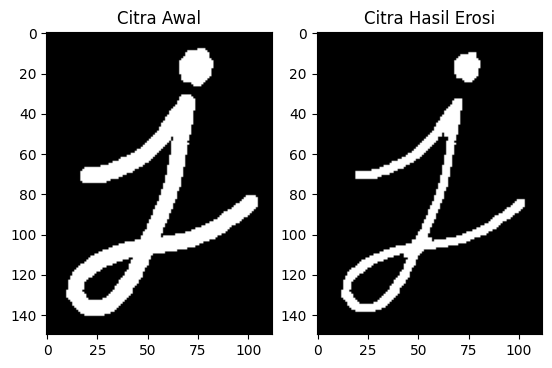

In [8]:
# Gambar yang digunakan
jImg = j_Img.copy()

# Buat kernel dengan Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

# Fungsi erosi gambar
eroded_image = cv2.erode(jImg, kernel, iterations=1)

# Menampilkan Hasil
plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(jImg)

plt.subplot(122)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image)


Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

In [9]:
fingerprintImg = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png')

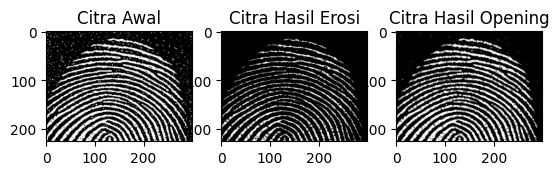

In [10]:
# Gambar yang digunakan
fingerImg = fingerprintImg.copy()

# Kernel yang digunakan
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Menggunakan fungsi

# Erosikan citra (Langkah 1)
eroded_image = cv2.erode(fingerImg, kernel, iterations=1)

# Dilasikan citra (Langkah 2)
opened_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Menampilkan Hasil
plt.subplot(131)
plt.title('Citra Awal')
plt.imshow(fingerImg)

plt.subplot(132)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image)

plt.subplot(133)
plt.title('Citra Hasil Opening')
plt.imshow(opened_image)

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

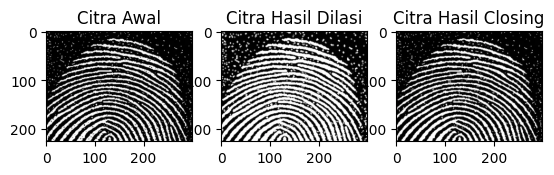

In [11]:
# Gambar yang digunakan
fingerImg = fingerprintImg.copy()

# Kernel yang digunakan
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Menggunakan fungsi

# Dilasikan citra (Langkah 1)
dilated_image = cv2.dilate(fingerImg, kernel, iterations=1)

# Erosikan citra (Langkah 2)
closed_image = cv2.erode(dilated_image, kernel, iterations=1)


# Menampilkan Hasil
plt.subplot(131)
plt.title('Citra Awal')
plt.imshow(fingerImg)

plt.subplot(132)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image)

plt.subplot(133)
plt.title('Citra Hasil Closing')
plt.imshow(closed_image)

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

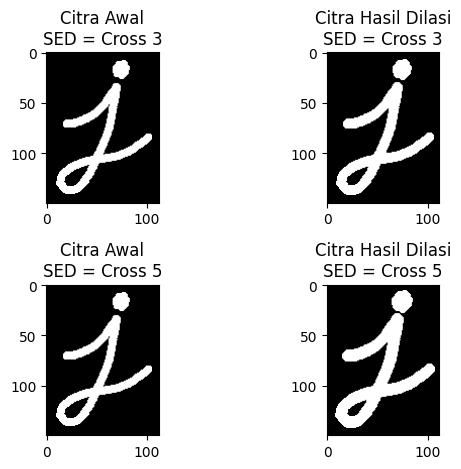

In [12]:
# Gambar yang digunakan
jImg = j_Img.copy()

# Kernel dengan Structuing Element
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Fungsi dilasi gambar
dilated3 = cv2.dilate(jImg, kernel3, iterations=1)

dilated5 = cv2.dilate(jImg, kernel5, iterations=1)

# Menampilkan hasil
plt.subplot(221)
plt.title('Citra Awal\nSED = Cross 3')
plt.imshow(jImg)

plt.subplot(222)
plt.title('Citra Hasil Dilasi\nSED = Cross 3')
plt.imshow(dilated3)

plt.subplot(223)
plt.title('Citra Awal\nSED = Cross 5')
plt.imshow(jImg)

plt.subplot(224)
plt.title('Citra Hasil Dilasi\nSED = Cross 5')
plt.imshow(dilated5)

plt.tight_layout()
plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

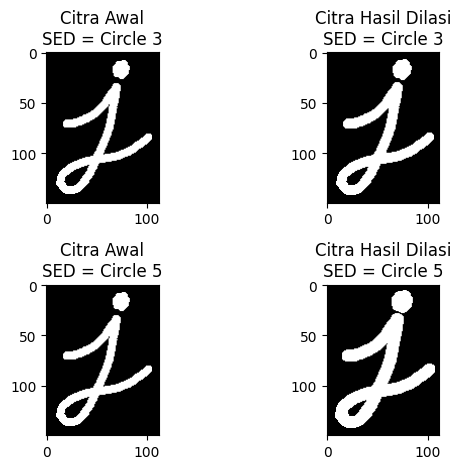

In [13]:
# Gambar yang digunakan
jImg = j_Img.copy()

# Kernel dengan Structuing Element
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Fungsi dilasi gambar
dilated3 = cv2.dilate(jImg, kernel3, iterations=1)

dilated5 = cv2.dilate(jImg, kernel5, iterations=1)

# Menampilkan hasil
plt.subplot(221)
plt.title('Citra Awal\nSED = Circle 3')
plt.imshow(jImg)

plt.subplot(222)
plt.title('Citra Hasil Dilasi\nSED = Circle 3')
plt.imshow(dilated3)

plt.subplot(223)
plt.title('Citra Awal\nSED = Circle 5')
plt.imshow(jImg)

plt.subplot(224)
plt.title('Citra Hasil Dilasi\nSED = Circle 5')
plt.imshow(dilated5)

plt.tight_layout()
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

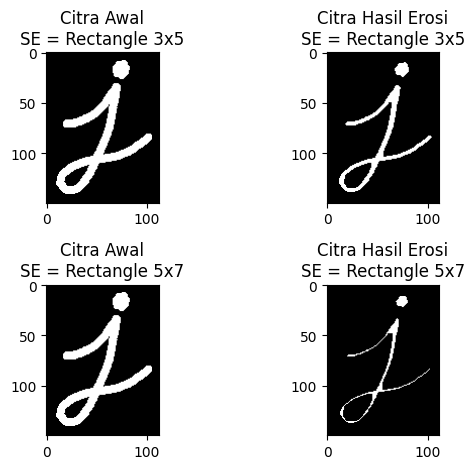

In [14]:
# Gambar yang digunakan
jImg = j_Img.copy()

# Kernel dengan Structuing Element
kernel35 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

kernel57 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Fungsi erosi gambar
eroded35 = cv2.erode(jImg, kernel35, iterations=1)

eroded57 = cv2.erode(jImg, kernel57, iterations=1)

# Menampilkan hasil
plt.subplot(221)
plt.title('Citra Awal\nSE = Rectangle 3x5')
plt.imshow(jImg)

plt.subplot(222)
plt.title('Citra Hasil Erosi\nSE = Rectangle 3x5')
plt.imshow(eroded35)

plt.subplot(223)
plt.title('Citra Awal\nSE = Rectangle 5x7')
plt.imshow(jImg)

plt.subplot(224)
plt.title('Citra Hasil Erosi\nSE = Rectangle 5x7')
plt.imshow(eroded57)

plt.tight_layout()
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

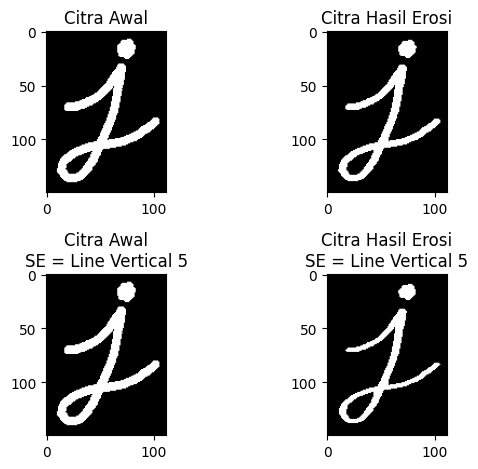

In [19]:
# Gambar yang digunakan
jImg = j_Img.copy()

# Kernel dengan Structuing Element
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))

kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Fungsi erosi gambar
erodedygy3 = cv2.erode(jImg, kernel3, iterations=1)

erodedygy5 = cv2.erode(jImg, kernel5, iterations=1)

# Menampilkan hasil
plt.subplot(221)
plt.title('Citra Awal')
plt.imshow(jImg)

plt.subplot(222)
plt.title('Citra Hasil Erosi')
plt.imshow(erodedygy3)

plt.subplot(223)
plt.title('Citra Awal\nSE = Line Vertical 5')
plt.imshow(jImg)

plt.subplot(224)
plt.title('Citra Hasil Erosi\nSE = Line Vertical 5')
plt.imshow(erodedygy5)

plt.tight_layout()
plt.show()

